In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [2]:
df = pd.read_csv('ESSdata.csv')
# year 6 = 2012
# year 7 = 2014

In [164]:
df[df['idno']==5.0]

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
773,CH,5.0,7,2.0,8.0,9.0,7.0,9.0,6.0,4.0,1.0,69.0,1.0
2892,ES,5.0,6,4.0,5.0,7.0,5.0,10.0,6.0,1.0,2.0,38.0,1.0
4105,ES,5.0,7,2.0,7.0,7.0,6.0,8.0,7.0,3.0,1.0,46.0,1.0


In [233]:
countries = df.cntry.unique().tolist()

### Question 1: Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

A/B Test - All participants experience both versions.  Use Paired sample t-test or Wilcoxon signed-rank depending on distibution.

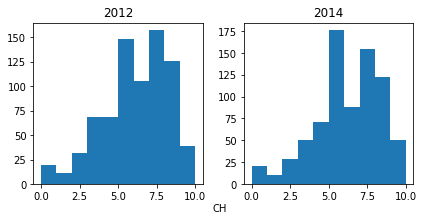

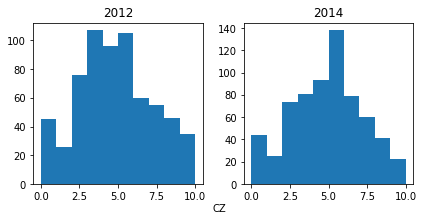

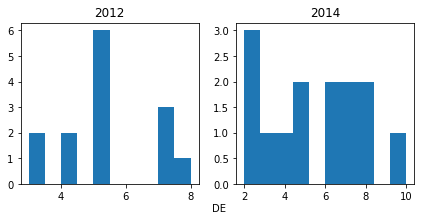

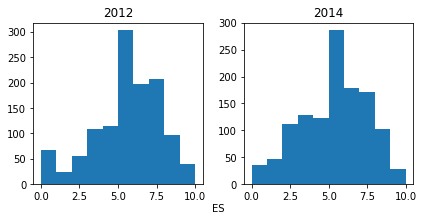

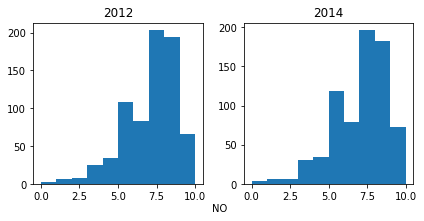

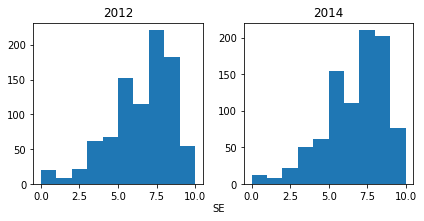

In [157]:
for country in countries:
    
    fig, axs = plt.subplots(1, 2, figsize=(6, 3))

    axs[0].hist(df['ppltrst'][(df['cntry'] == country) & (df['year']==6)].dropna())
    axs[1].hist(df['ppltrst'][(df['cntry'] == country) & (df['year']==7)].dropna())

    fig.text(0.5, 0, country)
    axs[0].set_title('2012')
    axs[1].set_title('2014')
    
    plt.tight_layout()
    plt.show()

In [197]:
for country in countries:
    print('\n', country)
    print('2012 mean: {0:.2f}'.format(df['ppltrst'][(df['cntry'] == country) & (df['year']==6)].mean()))
    print('2014 mean: {0:.2f}'.format(df['ppltrst'][(df['cntry'] == country) & (df['year']==7)].mean()))  
    print(stats.ttest_rel(df['ppltrst'][(df['cntry'] == country) & (df['year']==6)], 
                          df['ppltrst'][(df['cntry'] == country) & (df['year']==7)],
                          nan_policy='omit'
                         ))


 CH
2012 mean: 5.68
2014 mean: 5.75
Ttest_relResult(statistic=-0.6586851756725737, pvalue=0.5102943511301135)

 CZ
2012 mean: 4.36
2014 mean: 4.42
Ttest_relResult(statistic=-0.5001638336887216, pvalue=0.617129268240474)

 DE
2012 mean: 5.21
2014 mean: 5.36
Ttest_relResult(statistic=-0.18399501804849683, pvalue=0.8568563797095805)

 ES
2012 mean: 5.11
2014 mean: 4.90
Ttest_relResult(statistic=2.4561906976601646, pvalue=0.014181580725320272)

 NO
2012 mean: 6.65
2014 mean: 6.60
Ttest_relResult(statistic=0.5073077081124404, pvalue=0.61209257015177)

 SE
2012 mean: 6.06
2014 mean: 6.26
Ttest_relResult(statistic=-2.0671082026033982, pvalue=0.03900781670958545)


Using a parametric paired t-test, the only countries with significant differences between the 2012 and 2014 were ES(Spain) and SE(Sweden).  Spain's level of trust was the only one to decrease.

Run Germany with non-parametric:

In [200]:
print('DE non-parametric')
print('2012 median: {0:.2f}'.format(df['ppltrst'][(df['cntry'] == 'DE') & (df['year']==6)].median()))
print('2014 median: {0:.2f}'.format(df['ppltrst'][(df['cntry'] == 'DE') & (df['year']==7)].median()))  
print(stats.wilcoxon(df['ppltrst'][(df['cntry'] == country) & (df['year']==6)], 
                     df['ppltrst'][(df['cntry'] == country) & (df['year']==7)],
                     zero_method='wilcox'
                    ))

DE non-parametric
2012 median: 5.00
2014 median: 5.50
WilcoxonResult(statistic=130719.5, pvalue=0.028545290985536906)


c:\users\mtracy\appdata\local\programs\python\python36-32\lib\site-packages\scipy\stats\morestats.py:2388: RuntimeWarning: invalid value encountered in greater
  r_plus = np.sum((d > 0) * r, axis=0)
c:\users\mtracy\appdata\local\programs\python\python36-32\lib\site-packages\scipy\stats\morestats.py:2389: RuntimeWarning: invalid value encountered in less
  r_minus = np.sum((d < 0) * r, axis=0)


Using non-parametric methods, there was a difference between years in Germany; however, trust increased.

### 2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.

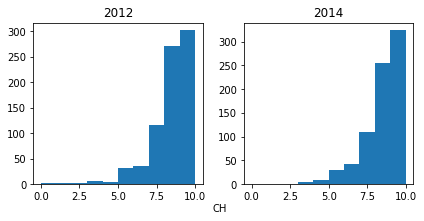

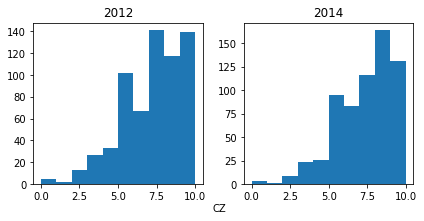

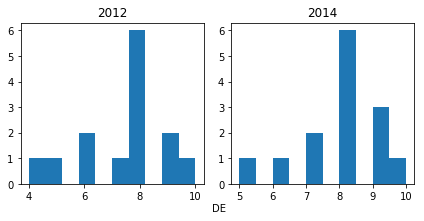

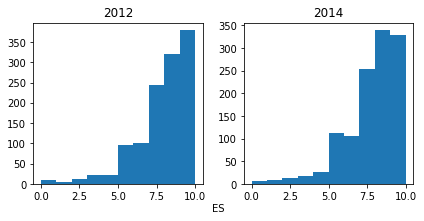

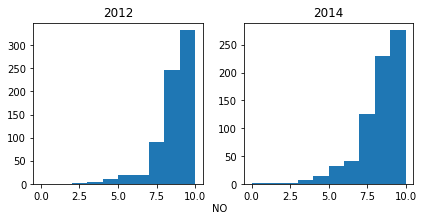

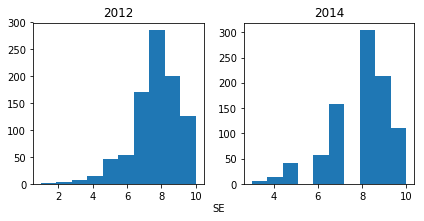

In [198]:
for country in countries:
    
    fig, axs = plt.subplots(1, 2, figsize=(6, 3))

    axs[0].hist(df['happy'][(df['cntry'] == country) & (df['year']==6)].dropna())
    axs[1].hist(df['happy'][(df['cntry'] == country) & (df['year']==7)].dropna())

    fig.text(0.5, 0, country)
    axs[0].set_title('2012')
    axs[1].set_title('2014')
    
    plt.tight_layout()
    plt.show()

Values are all skewed towards the high end.  Use non-parametric methods.

In [204]:
print('Non-parametric')
for country in countries:
    print('\n', country)
    print('2012 median: {0:.2f}'.format(df['happy'][(df['cntry'] == 'DE') & (df['year']==6)].median()))
    print('2014 median: {0:.2f}'.format(df['happy'][(df['cntry'] == 'DE') & (df['year']==7)].median()))  
    print(stats.wilcoxon(df['happy'][(df['cntry'] == country) & (df['year']==6)], 
                         df['happy'][(df['cntry'] == country) & (df['year']==7)],
                         zero_method='wilcox'
                        ))

Non-parametric

 CH
2012 median: 8.00
2014 median: 8.00
WilcoxonResult(statistic=92816.5, pvalue=0.8208688161425343)

 CZ
2012 median: 8.00
2014 median: 8.00
WilcoxonResult(statistic=73213.0, pvalue=0.01064243454053068)

 DE
2012 median: 8.00
2014 median: 8.00
WilcoxonResult(statistic=23.5, pvalue=0.393351316918508)

 ES
2012 median: 8.00
2014 median: 8.00
WilcoxonResult(statistic=231958.5, pvalue=0.04923868084306013)

 NO
2012 median: 8.00
2014 median: 8.00
WilcoxonResult(statistic=67571.5, pvalue=2.7264367804254175e-06)

 SE
2012 median: 8.00
2014 median: 8.00
WilcoxonResult(statistic=125481.0, pvalue=0.5136403441005022)


c:\users\mtracy\appdata\local\programs\python\python36-32\lib\site-packages\scipy\stats\morestats.py:2388: RuntimeWarning: invalid value encountered in greater
  r_plus = np.sum((d > 0) * r, axis=0)
c:\users\mtracy\appdata\local\programs\python\python36-32\lib\site-packages\scipy\stats\morestats.py:2389: RuntimeWarning: invalid value encountered in less
  r_minus = np.sum((d < 0) * r, axis=0)


From the results above, CZ and ES had significant differences between in happiness values between 2012 and 2014.  How can you tell if it was an increase or decrease in values since it's not really apparent in the histograms?

Compare to parametric paired T-test:

In [205]:
print('Parametric')
for country in countries:
    print('\n', country)
    print('2012 mean: {0:.2f}'.format(df['happy'][(df['cntry'] == 'DE') & (df['year']==6)].mean()))
    print('2014 mean: {0:.2f}'.format(df['happy'][(df['cntry'] == 'DE') & (df['year']==7)].mean()))  
    print(stats.ttest_rel(df['happy'][(df['cntry'] == country) & (df['year']==6)], 
                          df['happy'][(df['cntry'] == country) & (df['year']==7)],
                          nan_policy='omit'
                         ))

Parametric

 CH
2012 mean: 7.43
2014 mean: 7.86
Ttest_relResult(statistic=-0.319412957862232, pvalue=0.7495001355429063)

 CZ
2012 mean: 7.43
2014 mean: 7.86
Ttest_relResult(statistic=-1.4561384833039597, pvalue=0.1458454843389451)

 DE
2012 mean: 7.43
2014 mean: 7.86
Ttest_relResult(statistic=-0.8062257748298549, pvalue=0.4346138707734991)

 ES
2012 mean: 7.43
2014 mean: 7.86
Ttest_relResult(statistic=1.613832417735418, pvalue=0.10682451556479494)

 NO
2012 mean: 7.43
2014 mean: 7.86
Ttest_relResult(statistic=4.2856826576235925, pvalue=2.067453013405473e-05)

 SE
2012 mean: 7.43
2014 mean: 7.86
Ttest_relResult(statistic=-0.5581637086030012, pvalue=0.5768709591233714)


No change in happiness scores based on parametric tests.

### 3. Who reported watching more TV in 2012, men or women?

Independent t-test for normal(ish) distributions

In [206]:
df.head()
# gender 1 = male
# gender 2 = female

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


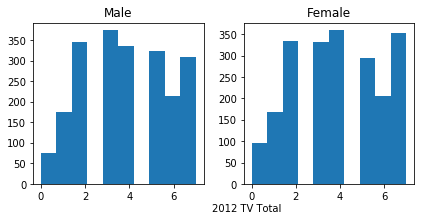

In [222]:
male = df['tvtot'][(df['gndr'] == 1.0) & (df['year'] == 6)]
female = df['tvtot'][(df['gndr'] == 2.0) & (df['year'] == 6)]

fig, axs = plt.subplots(1, 2, figsize=(6, 3))

axs[0].hist(male.dropna())
axs[1].hist(female.dropna())

fig.text(0.5, 0, '2012 TV Total')
axs[0].set_title('Male')
axs[1].set_title('Female')
    
plt.tight_layout()
plt.show()

In [218]:
print('Male mean: {0:.2f}'.format(male.mean()))
print('Female mean: {0:.2f}'.format(female.mean()))  
print(stats.ttest_ind(male, 
                    female,
                    nan_policy='omit'
                    ))

Male mean: 3.90
Female mean: 3.94
Ttest_indResult(statistic=-0.6899928109209502, pvalue=0.49023604027095813)


There is no difference in reported tv watching time for men vs. women during 2012.

### 4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

In [221]:
df.head(1)
#partner 1 = lives with someone
#partner 2 = lives alone
# year 6 = 2012

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0


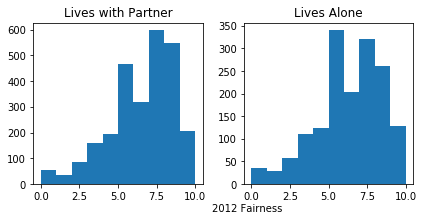

In [223]:
partner = df['pplfair'][(df['partner'] == 1.0) & (df['year'] == 6)]
alone = df['pplfair'][(df['partner'] == 2.0) & (df['year'] == 6)]

fig, axs = plt.subplots(1, 2, figsize=(6, 3))

axs[0].hist(partner.dropna())
axs[1].hist(alone.dropna())

fig.text(0.5, 0, '2012 Fairness')
axs[0].set_title('Lives with Partner')
axs[1].set_title('Lives Alone')
    
plt.tight_layout()
plt.show()

In [224]:
print('Lives with partner mean: {0:.2f}'.format(partner.mean()))
print('Lives alone mean: {0:.2f}'.format(alone.mean()))  
print(stats.ttest_ind(partner, 
                    alone,
                    nan_policy='omit'
                    ))

Lives with partner mean: 6.08
Lives alone mean: 5.86
Ttest_indResult(statistic=3.3201033970362084, pvalue=0.0009073952609876207)


People living with a partner were more likely to believe people were fair in 2012 than those living alone.

### 5. Pick three or four of the countries in the sample and compare how often people met socially in 2014.  Are there differences, and if so, which countries stand out?

In [240]:
social = countries[3:]
print(social)
df.head(1)

['ES', 'NO', 'SE']


,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0


In [278]:
ES_meet = df['sclmeet'][(df['cntry'] == 'ES') & (df['year'] == 7)].dropna()
NO_meet = df['sclmeet'][(df['cntry'] == 'NO') & (df['year'] == 7)].dropna()
SE_meet = df['sclmeet'][(df['cntry'] == 'SE') & (df['year'] == 7)].dropna()

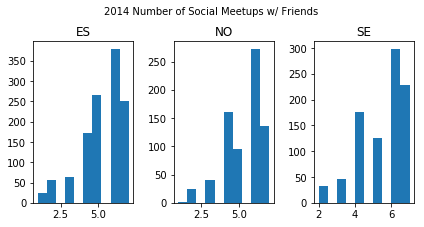

In [279]:
fig, axs = plt.subplots(1, 3, figsize=(6, 3))

axs[0].hist(ES_meet)
axs[1].hist(NO_meet)
axs[2].hist(SE_meet)

fig.text(0.25, 1, '2014 Number of Social Meetups w/ Friends')
axs[0].set_title('ES')
axs[1].set_title('NO')
axs[2].set_title('SE')
    
plt.tight_layout()
plt.show()

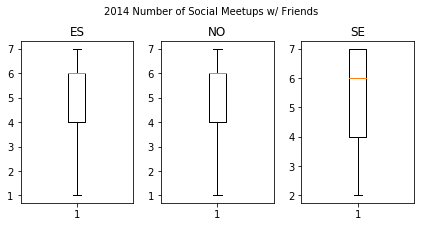

In [280]:
fig, axs = plt.subplots(1, 3, figsize=(6, 3))

axs[0].boxplot(ES_meet)
axs[1].boxplot(NO_meet)
axs[2].boxplot(SE_meet)

fig.text(0.25, 1, '2014 Number of Social Meetups w/ Friends')
axs[0].set_title('ES')
axs[1].set_title('NO')
axs[2].set_title('SE')
    
plt.tight_layout()
plt.show()

In [290]:
F, p = stats.f_oneway(ES_meet, NO_meet, SE_meet)
print('F statistic:', F, '\np-value:', p)

F statistic: 3.726110434690217 
p-value: 0.02420388186106648


In [291]:
print('ES:', ES_meet.mean(), ES_meet.count())
print('NO:', NO_meet.mean(), NO_meet.count())
print('SE:', SE_meet.mean(), SE_meet.count())

print('\n', stats.ttest_ind(ES_meet, NO_meet))
print(stats.ttest_ind(ES_meet, SE_meet))
print(stats.ttest_ind(SE_meet, NO_meet))

ES: 5.2601156069364166 1211
NO: 5.3023255813953485 731
SE: 5.426211453744493 908

 Ttest_indResult(statistic=-0.632916395870007, pvalue=0.5268628350318294)
Ttest_indResult(statistic=-2.649547268580078, pvalue=0.00811992279651295)
Ttest_indResult(statistic=1.8305856428076237, pvalue=0.06734412432597783)


There are significant differences between groups based on the one way ANOVA.  Using an independent t-test to compare each country to one another, it looks like there is a significant difference in social encounters between Spain (ES) and Sweden (SE), with Sweden having more social encounters.

### 6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others in their age, in 2014.  Are there any differences?  If so, which countries stand out?

In [285]:
ES_act = df['sclact'][(df['cntry'] == 'ES') & (df['year'] == 7)].dropna()
NO_act = df['sclact'][(df['cntry'] == 'NO') & (df['year'] == 7)].dropna()
SE_act = df['sclact'][(df['cntry'] == 'SE') & (df['year'] == 7)].dropna()

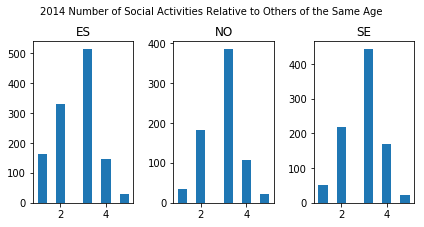

In [287]:
fig, axs = plt.subplots(1, 3, figsize=(6, 3))

axs[0].hist(ES_act)
axs[1].hist(NO_act)
axs[2].hist(SE_act)

fig.text(0.1, 1, '2014 Number of Social Activities Relative to Others of the Same Age')
axs[0].set_title('ES')
axs[1].set_title('NO')
axs[2].set_title('SE')
    
plt.tight_layout()
plt.show()

In [288]:
F, p = stats.f_oneway(ES_act, NO_act, SE_act)
print('F statistic:', F, '\np-value:', p)

F statistic: 27.753885475253163 
p-value: 1.1583945951240228e-12


In [292]:
print('ES:', ES_act.mean(), ES_act.count())
print('NO:', NO_act.mean(), NO_act.count())
print('SE:', SE_act.mean(), SE_act.count())

print('\n', stats.ttest_ind(ES_act, NO_act))
print(stats.ttest_ind(ES_act, SE_act))
print(stats.ttest_ind(SE_act, NO_act))

ES: 2.6168776371308016 1185
NO: 2.859097127222982 731
SE: 2.879424778761062 904

 Ttest_indResult(statistic=-5.671149129663532, pvalue=1.6345881270312057e-08)
Ttest_indResult(statistic=-6.500257345866597, pvalue=1.0000807299873859e-10)
Ttest_indResult(statistic=0.4823216270234106, pvalue=0.6296421272017451)


P-value from the ANOVA leads us to believe there are differences between the countries, yet t-test results do not indicate any significant differences between groups.